# Keshava Tonathiu Sanchez Barbosa (keshava.t.s.b@gmail.com)

# Cruza dominante

### El objetivo de la cruza dominante es heredar la mayor cantidad de genetica de el padre con mayor aptitud en comparación con su compañero de cruza. 

### La forma en que se busca realizar esto es comparando la aptitud de los padres y encontrando quien sera el padre dominante y el padre secundario.

### Una vez sabiendo esto segun cuantas veces es mejor un padre del otro se determinara el porcentaje que abarcaran los genes de ambos padres, dando prioridad al padre dominante.

### La forma en que se determinara el porcentaje que abarcaran los genes del padre en el hijo sera dividiendo la aptitud del padre dominante entre la aptitud del padre secundario

- Si el padre dominante tiene la misma aptitud que el secundario: 50% dominante 50% secundario
- Si el padre dominante tiene entre 1 y 2 veces mejor aptitud que el secundario: 65% padre dominante 35% padre secundario
- Si el padre dominante tiene entre 2 y 3 veces mejor aptitud que el secundario: 75% padre dominante 25% padre secundario
- Si el padre dominante tiene entre 3 o más veces mejor aptitud que el secundario: 85% padre dominante 15% padre secundario

## Pseudo-codigo

- Se reciben dos padres y las aptitudes de cada padre
- Se comparan las aptitudes y posterior a eso se asigna al padre de mayor aptitud como el padre dominante y el segundo como el padre secundario
- Se divide la aptitud del padre dominante entre la aptitud del padre secundario para determinar cuantas veces es mejor uno que el otro
- Dependiendo el valor obtenido de la division se determinara el porcentaje de la cadena binaria del hijo que representara tanto el padre dominante como el secundario
- Se convierte el porcentaje en numero entero para las longitudes ld del padre dominante y ls del padre secundario a partid de la longitud total de la cadena binaria del hijo a generar
- De manera aleatoria se extrae una cadena de longitud ld y ls de cada padre de manera respectiva del padre dominante y el padre secundario
- Para efectuar la cruza se obtienen dos indices aleatorios desde 0 hasta ld (id) y 0 hasta ls (is)
- Una vez obtenido el indice la cadena binaria se generara de la siguiente manera:
- Hijo 1:
    - Del padre dominante se insertan los valores de la cadena desde 0 hasta id
    - Del padre secundario se inserta toda la cadena obtenida
    - Del padre dominante se inserta el resto de de la cadena
- Hijo 2:
    - Del padre secundario se insertan los valores de la cadena desde 0 hasta is
    - Del padre dominante se inserta toda la cadena
    - Del padre secundario se inserta el resto de la cadena
- Se regresa hijo 1 e hijo 2

### Codigo

In [1]:
def dominant_cross(p1, p2, aptitude_p1, aptitude_p2):
    
    if aptitude_p1 > aptitude_p2:
        dominant = copy.copy(p1)
        secondary = copy.copy(p2)
        aptitude_dominant = aptitude_p1
        aptitude_secondary = aptitude_p2
    else:
        dominant = copy.copy(p2)
        secondary = copy.copy(p1)
        aptitude_dominant = aptitude_p2
        aptitude_secondary = aptitude_p1
        
    diff = aptitude_dominant/aptitude_secondary
    
    if diff <= 1:
        ld = int(math.ceil(len(p1)/2))
        ls = len(p1) - ld
        
    elif diff > 1 and diff < 2:
        ld = int(math.ceil(len(p1)*0.65))
        ls = len(p1) - ld
        
    elif diff > 2 and diff < 3:
        ld = int(math.ceil(len(p1)*0.75))
        ls = len(p1) - ld
        
    elif diff > 3:
        ld = int(math.ceil(len(p1)*0.85))
        ls = len(p1) - ld
    
    i_d = random.choice(list(range(len(p1)-ld)))
    i_s = random.choice(list(range(len(p1)-ls)))
    
    dominant_st = dominant[i_d:i_d+ld]
    secondary_st = secondary[i_s:i_s+ls]
    
    i_d = random.choice(list(range(ld)))
    i_s = random.choice(list(range(ls)))
    
    son1 = []
    son1.extend(dominant_st[:i_d])
    son1.extend(secondary_st)
    son1.extend(dominant_st[i_d:])

    son2 = []
    son2.extend(secondary_st[:i_s])
    son2.extend(dominant_st)
    son2.extend(secondary_st[i_s:])
    
    return son1, son2

## Midiendo la efectividad de la cruza

### Para medir la efectividad de esta cruza se comparara los resultados obtenidos de la ejecucion de un mismo algoritmo genetico para la optimizacion de la funcion de ackley y se comparara los resultados obtenidos

In [2]:
import numpy as np
import math
import operator
from operator import itemgetter
import random
import copy
import pandas as pd

### Valor decimal de cadena binaria

In [3]:
def valor_decimal_ackley(x):
    num_entero = 0
    for i in range(len(x)):
        num_entero += x[-(i+1)]*(2**i) 
    r = -30 + (60*num_entero)/((2**len(x))-1)
    return r

### evaluacion de ackley

In [4]:
def sum1(x):
    t_sum = 0
    for i in range(len(x)):
        t_sum += x[i]**2
    
    return t_sum 

def sum2(x):
    t_sum = 0
    for i in range(len(x)):
        t_sum += np.cos(2 * np.pi * x[i])
    
    return t_sum

In [5]:
def ackley(x):
    return -20*math.exp(-0.2*np.sqrt(sum1(x)/len(x))) - math.exp(sum2(x)/len(x)) + 20 + math.e

### sirve para convertir las cadenas binarias en lista a cadenas binarias en string

In [6]:
def parents_to_strings(parents):
    p_string = []
    for p in parents:
        string_a = ""
        p1 = p[0]
        for i in p1:
            string_a += str(i)
        p_string.append(string_a)
        
    return p_string

### encuentra el indice especifico de un par de padres en la poblacion

In [7]:
def find_index_parents(parent1, parent2, parents):
    ind1 = parents.index(parent1)
    ind2 = parents.index(parent2)
    indexes = [ind1, ind2]
    indexes = sorted(indexes)
    
    return indexes

### encuentra el indice especifico de un par de padres en la poblacion

In [8]:
def find_index_parents(parent1, parent2, parents):
    ind1 = parents.index(parent1)
    ind2 = parents.index(parent2)
    indexes = [ind1, ind2]
    indexes = sorted(indexes)
    
    return indexes

### aptitud promedio

In [9]:
def avg_aptitude_value(population):
    avg = 0
    for p in range(len(population)):
        avg += population[p][3]
    
    return avg/len(population)    

### el valor esperado ajustado para minimizar

In [10]:
def aptitude_value(worst, x):
    real = worst - x
    return worst + real

### Metodo de seleccion universal estocastico

In [11]:
def universal_stochastic(population, N):
    ptr = random.random() #genero el numero aleatorio entre 0 y 1
    s = 0 #suma
    avg = avg_aptitude_value(population) #aptitud promedio de poblacion
    parents = [] #donde se almacenaran los padres
    for i in range(len(population)):
        s += population[i][3]/avg #se agrega el numero esperado de cada padre a la suma
        while s > ptr and len(parents) < N: 
            parents.append(population[i]) #solo agrego a la lista de padres su cadena binaria, puesto que no necesita el resto de la informacion, ya que sera recalculada para los hijos generados
            ptr += 1
    
    return parents #regresa la lista de padres

### Entrada para una ejecucion del algoritmo genetico

In [12]:
max_gen, N = 600, 100 #list(map(int, input().split()))
pc, pm = 0.9, 0.05 #list(map(float, input().split()))

### calculamos la longitud de la cadena binaria

In [13]:
bin_string_len_ackley = math.ceil(np.log2((60*(10**5))))
bin_string_len_ackley

23

### generamos la cadena binaria de manera aleatoria

In [14]:
bin_ackley = [np.random.randint(2, size = bin_string_len_ackley*2) for n in range(N)]

### evaluamos los padres generados de manera aleatoria

In [15]:
population_ackley = []
#gen_info_ack = []
avg_aptitude_cross = []
avg_aptitude_dominant = []

for b in bin_ackley:
    binary_str1 = b[:bin_string_len_ackley]
    binary_str2 = b[bin_string_len_ackley:]
    decimal0 = valor_decimal_ackley(binary_str1)
    decimal1 = valor_decimal_ackley(binary_str2)
    coord = [decimal0, decimal1]
    eval_ackley = ackley(coord)
    population_ackley.append([b, coord, eval_ackley]) #cada elemento de la lista tendra la cadena binaria, los valores decimales correspondientes y su evaluacion en la funcion
    
population_ackley = sorted(population_ackley, key = lambda x: x[2])
ackley_worst = population_ackley[-1]
    
for p in range(len(population_ackley)):
    aptitude = aptitude_value(ackley_worst[2], population_ackley[p][2])
    population_ackley[p].append(aptitude)
    
avg_aptitude_cross.append(avg_aptitude_value(population_ackley))
avg_aptitude_dominant.append(avg_aptitude_value(population_ackley))

### algoritmo genetico

In [16]:
t = 0
while t < max_gen:
    population_ackley = sorted(population_ackley, key = lambda x: x[2]) #ordenamos la poblacion de acuerdo al valor que tienen en la evaluacion
    best_ind = population_ackley[0]
    parents = universal_stochastic(population_ackley, N)
    sons = []
    string_parents = parents_to_strings(parents) #generamos una lista de strings a partir de las cadenas binarias de los padres
    n_p = int(len(parents)/2)
    for p in range(n_p):
        if random.random() < pc:
            parent_string_1 = random.choice(string_parents) #obtenemos los padres de manera aleatoria
            parent_string_2 = random.choice(string_parents)
            indexes = find_index_parents(parent_string_1, parent_string_2, string_parents) #obtenemos los indices de los padres
            parent1 = parents[indexes[0]] #guardamos las cadenas binarias de los padres en variables
            parent2 = parents[indexes[1]]
            string_parents.pop(indexes[0]) #eliminamos de la lista de padres a los seleccionados
            string_parents.pop(indexes[1]-1)
            parents.pop(indexes[0])
            parents.pop(indexes[1]-1)
            
            son1, son2 = dominant_cross(parent1[0], parent2[0], parent1[3], parent2[3])
            
            for i in range(len(son1)): #se va espacio por espacio de la cadena binaria verificando si se modificara el valor
                if random.random() < pm: #de cada elemento que forma al individuo haciendo un volado
                    #n_mutation += 1
                    if son1[i] == 0 :
                        son1[i] = 1
                    else:
                        son1[i] = 0

                if random.random() < pm:
                    #n_mutation += 1
                    if son2[i] == 0 :
                        son2[i] = 1
                    else:
                        son2[i] = 0

            sons.append(son1)
            sons.append(son2)
        
        else:
            parent_string_1 = random.choice(string_parents) #si el valor es mayor que la probabilidad de cruza
            parent_string_2 = random.choice(string_parents) #se eligen 2 padres de manera aleatoria
            indexes = find_index_parents(parent_string_1, parent_string_2, string_parents)
            parent1 = parents[indexes[0]]
            parent2 = parents[indexes[1]]
            string_parents.pop(indexes[0]) #se eliminan de la lista de padres
            string_parents.pop(indexes[1]-1)
            parents.pop(indexes[0])
            parents.pop(indexes[1]-1)
            sons.append(parent1[0]) #se agregan directamente a los hijos
            sons.append(parent2[0])
            
    sons_ack = []
    
    for s in sons: #se evalua cada hijo en la funcion
        binary_str1 = s[:bin_string_len_ackley]
        binary_str2 = s[bin_string_len_ackley:]
        decimal0 = valor_decimal_ackley(binary_str1)
        decimal1 = valor_decimal_ackley(binary_str2)
        coord = [decimal0, decimal1]
        eval_ackley = ackley(coord)
        aux = [s, coord, eval_ackley]
        sons_ack.append(aux) #cada hijo tendra su cadena binaria, sus valores decimales como coordenada, su evaluacion
        
    worst = sons_ack[-1]
    for s in range(len(sons_ack)):
        aptitude = aptitude_value(worst[2], sons_ack[s][2])
        sons_ack[s].append(aptitude)
        
    worst_ind = sons_ack[-1] #se obtiene el peor individuo de los hijos
    if worst_ind[2] > best_ind[2]: #si el mejor padre es mejor (segun f(x)) que el peor hijo, se reemplaza el peor hijo con el mejor padre
        sons_ack[-1] = best_ind
        
    population_ackley = copy.copy(sons_ack) #los hijos se convierten en los padres
    
    avg_aptitude_dominant.append(avg_aptitude_value(population_ackley))
    
    t += 1
    
population_ackley = sorted(population_ackley, key = lambda x: x[2]) #se realiza un ultimo ordenamiento segun su valor en la funcion

# Resultados de ejecucion con cruza dominante

In [17]:
print("cadena binaria", population_ackley[0][0])
print("valores decimales de cadena binaria: ", population_ackley[0][1])
print("optimo encontrado: ", population_ackley[0][2])

cadena binaria [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1]
valores decimales de cadena binaria:  [-0.17647149282354135, 0.06741643755631799]
optimo encontrado:  1.274260497996551


# Resultados de la ejecucion con cruza de dos puntos

In [15]:
print("cadena binaria", population_ackley[0][0])
print("valores decimales de cadena binaria: ", population_ackley[0][1])
print("optimo encontrado: ", population_ackley[0][2])

cadena binaria [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
valores decimales de cadena binaria:  [3.576279112849079e-06, -3.576279112849079e-06]
optimo encontrado:  1.430579759231776e-05


# Grafica de aptitud promedio por generación

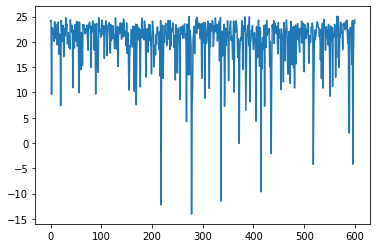

In [19]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(avg_aptitude_dominant)

# Conclusiones

### La cruza dominante es un concepto en etapas muy tempranas, a pesar de que el algoritmo genetico logro acercarse al optimo, no logro hacerlo con tal precision como cuando se uso cruza de dos puntos.

### Quiza con un tiempo mas largo de desarrollo y ajustes en el algoritmo sea posible mejorar el desempeño de esta cruza.